In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

In [2]:
# Load the features and labels from CSV
df = pd.read_csv('/kaggle/input/glcm-a4c/complete_glcm_features_a4c.csv')

# Separate features and labels
X = df.drop('Label', axis=1)
y = df['Label']

In [3]:
# Handle missing values if there are any
X.fillna(X.mean(), inplace=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 84.39%
Classification Report:
              precision    recall  f1-score   support

         III       0.82      0.93      0.87      6406
          MS       0.88      0.76      0.82      3285
          NL       0.86      0.76      0.81      3292

    accuracy                           0.84     12983
   macro avg       0.85      0.82      0.83     12983
weighted avg       0.85      0.84      0.84     12983



GLCM Confusion Matrix for A4C View:
[[5933  212  261]
 [ 617 2509  159]
 [ 660  117 2515]]


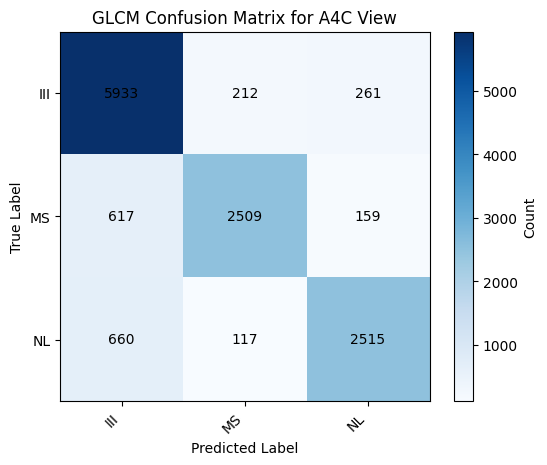

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a function to plot the confusion matrix (optional)
def plot_confusion_matrix(cm, class_names):
  """
  Plots a confusion matrix with labels.
  """
  fig, ax = plt.subplots()
  im = ax.imshow(cm, cmap=plt.cm.Blues)
  ax.grid(False)
  for i in range(len(class_names)):
    for j in range(len(class_names)):
      ax.text(j, i, cm[i, j], ha='center', va='center', color="black")
  ax.set_ylabel("True Label")
  ax.set_xlabel("Predicted Label")
  ax.set_title("GLCM Confusion Matrix for A4C View")
  ax.set_xticks(np.arange(len(class_names)))
  ax.set_yticks(np.arange(len(class_names)))
  ax.set_xticklabels(class_names, rotation=45, ha='right')
  ax.set_yticklabels(class_names)
  plt.colorbar(im, label='Count')
  plt.show()

# Print the confusion matrix
print("GLCM Confusion Matrix for A4C View:")
print(cm)

# Plot the confusion matrix (optional)
class_names = ["III", "MS", "NL"]  # Assuming these are your class labels
plot_confusion_matrix(cm, class_names)

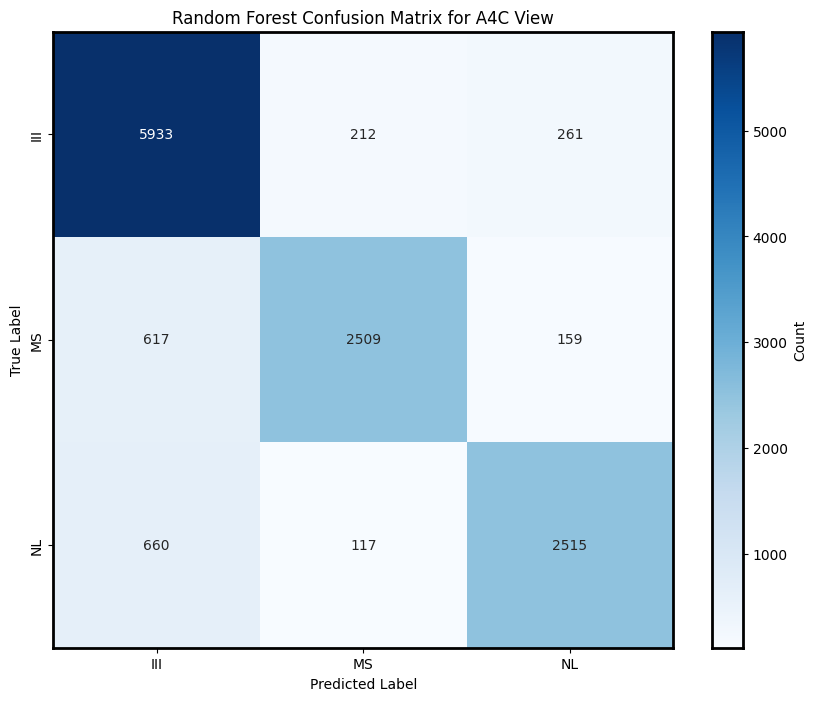

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix values extracted from the provided image for A4C view
conf_matrix_values_a4c = np.array([
    [5933, 212, 261],  # True III
    [617, 2509, 159],  # True MS
    [660, 117, 2515]   # True NL
])

# Labels for the classes
labels_a4c = ['III', 'MS', 'NL']

# Create a figure with one subplot for the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_matrix_values_a4c, annot=True, fmt='d', cmap='Blues', xticklabels=labels_a4c, yticklabels=labels_a4c, cbar=True, ax=ax)

# Add black border around the entire confusion matrix
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(2)

# Add black border around the color bar
cbar = ax.collections[0].colorbar
cbar.ax.spines['top'].set_visible(True)
cbar.ax.spines['top'].set_color('black')
cbar.ax.spines['top'].set_linewidth(2)
cbar.ax.spines['bottom'].set_visible(True)
cbar.ax.spines['bottom'].set_color('black')
cbar.ax.spines['bottom'].set_linewidth(2)
cbar.ax.spines['left'].set_visible(True)
cbar.ax.spines['left'].set_color('black')
cbar.ax.spines['left'].set_linewidth(2)
cbar.ax.spines['right'].set_visible(True)
cbar.ax.spines['right'].set_color('black')
cbar.ax.spines['right'].set_linewidth(2)

# Add 'Count' next to the color bar
cbar.ax.set_ylabel('Count')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix for A4C View')
plt.show()


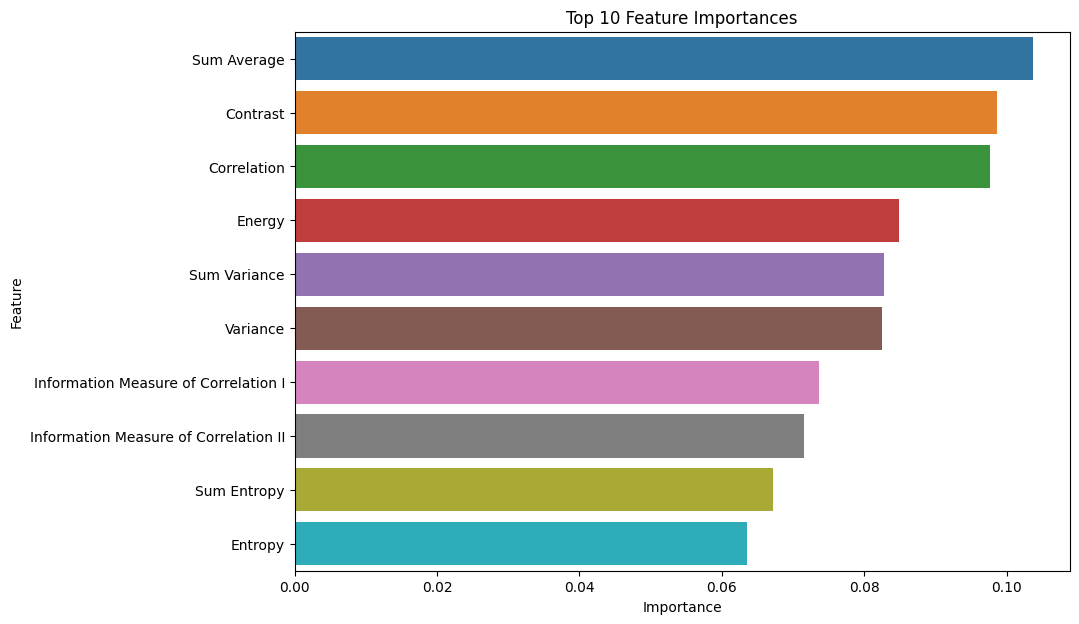

In [12]:
# Get feature importances from the classifier
import seaborn as sns
feature_importances = classifier.feature_importances_

# Create a DataFrame for visualization
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()


---

In [23]:
# Load the features and labels from CSV
df2 = pd.read_csv('/kaggle/input/glcm-pla/complete_glcm_features_PLA.csv')

# Separate features and labels
X = df2.drop('Label', axis=1)
y = df2['Label']

In [24]:
# Handle missing values if there are any
X.fillna(X.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier
RandomForestClassifier(random_state=42)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 83.39%
Classification Report:
              precision    recall  f1-score   support

         III       0.81      0.93      0.87      6535
          MS       0.84      0.77      0.80      3190
         MVP       0.87      0.66      0.75      1327
          NL       0.87      0.77      0.82      3461

    accuracy                           0.83     14513
   macro avg       0.85      0.78      0.81     14513
weighted avg       0.84      0.83      0.83     14513



Confusion Matrix for A4C View:
[[6100  216   42  177]
 [ 562 2459   44  125]
 [ 255   98  877   97]
 [ 588  163   44 2666]]


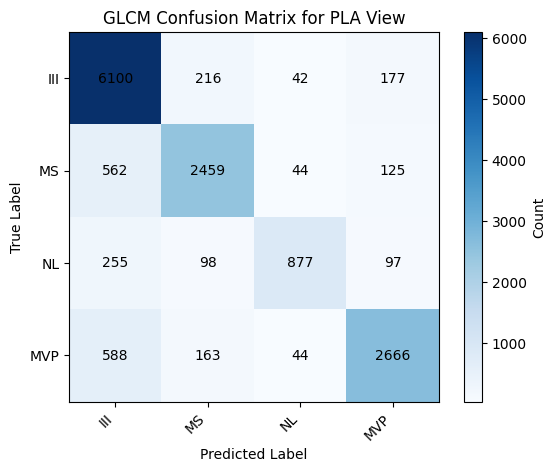

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a function to plot the confusion matrix (optional)
def plot_confusion_matrix(cm, class_names):
  """
  Plots a confusion matrix with labels.
  """
  fig, ax = plt.subplots()
  im = ax.imshow(cm, cmap=plt.cm.Blues)
  ax.grid(False)
  for i in range(len(class_names)):
    for j in range(len(class_names)):
      ax.text(j, i, cm[i, j], ha='center', va='center', color="black")
  ax.set_ylabel("True Label")
  ax.set_xlabel("Predicted Label")
  ax.set_title("GLCM Confusion Matrix for PLA View")
  ax.set_xticks(np.arange(len(class_names)))
  ax.set_yticks(np.arange(len(class_names)))
  ax.set_xticklabels(class_names, rotation=45, ha='right')
  ax.set_yticklabels(class_names)
  plt.colorbar(im, label='Count')
  plt.show()

# Print the confusion matrix
print("Confusion Matrix for A4C View:")
print(cm)

# Plot the confusion matrix (optional)
class_names = ["III", "MS", "NL", "MVP"]  # Assuming these are your class labels
plot_confusion_matrix(cm, class_names)

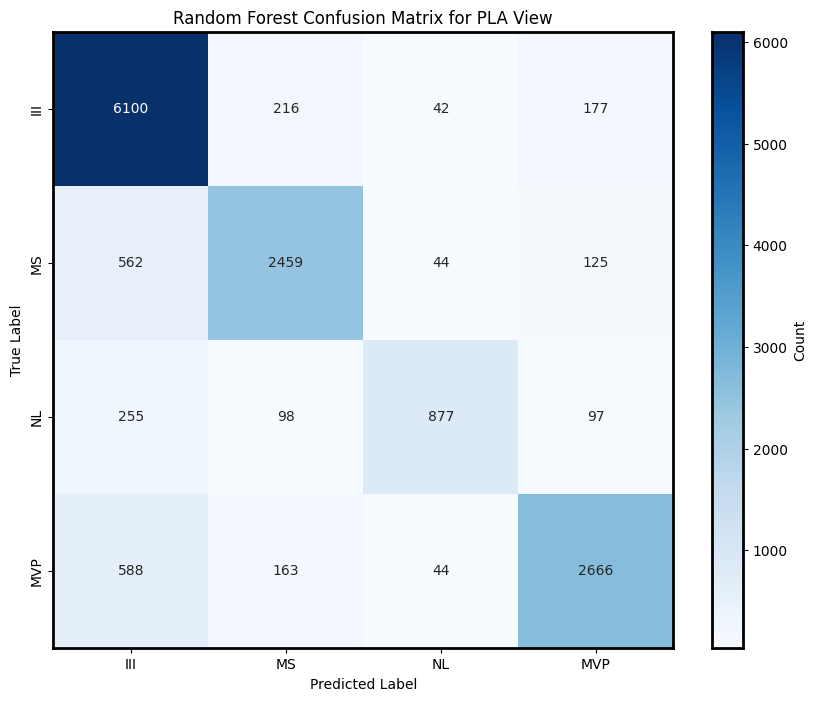

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix values extracted from the provided image for PLA view
conf_matrix_values_pla = np.array([
    [6100, 216, 42, 177],  # True III
    [562, 2459, 44, 125],  # True MS
    [255, 98, 877, 97],    # True NL
    [588, 163, 44, 2666]   # True MVP
])

# Labels for the classes
labels_pla = ['III', 'MS', 'NL', 'MVP']

# Create a figure with one subplot for the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_matrix_values_pla, annot=True, fmt='d', cmap='Blues', xticklabels=labels_pla, yticklabels=labels_pla, cbar=True, ax=ax)

# Add black border around the entire confusion matrix
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(2)

# Add black border around the color bar
cbar = ax.collections[0].colorbar
cbar.ax.spines['top'].set_visible(True)
cbar.ax.spines['top'].set_color('black')
cbar.ax.spines['top'].set_linewidth(2)
cbar.ax.spines['bottom'].set_visible(True)
cbar.ax.spines['bottom'].set_color('black')
cbar.ax.spines['bottom'].set_linewidth(2)
cbar.ax.spines['left'].set_visible(True)
cbar.ax.spines['left'].set_color('black')
cbar.ax.spines['left'].set_linewidth(2)
cbar.ax.spines['right'].set_visible(True)
cbar.ax.spines['right'].set_color('black')
cbar.ax.spines['right'].set_linewidth(2)

# Add 'Count' next to the color bar
cbar.ax.set_ylabel('Count')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix for PLA View')
plt.show()


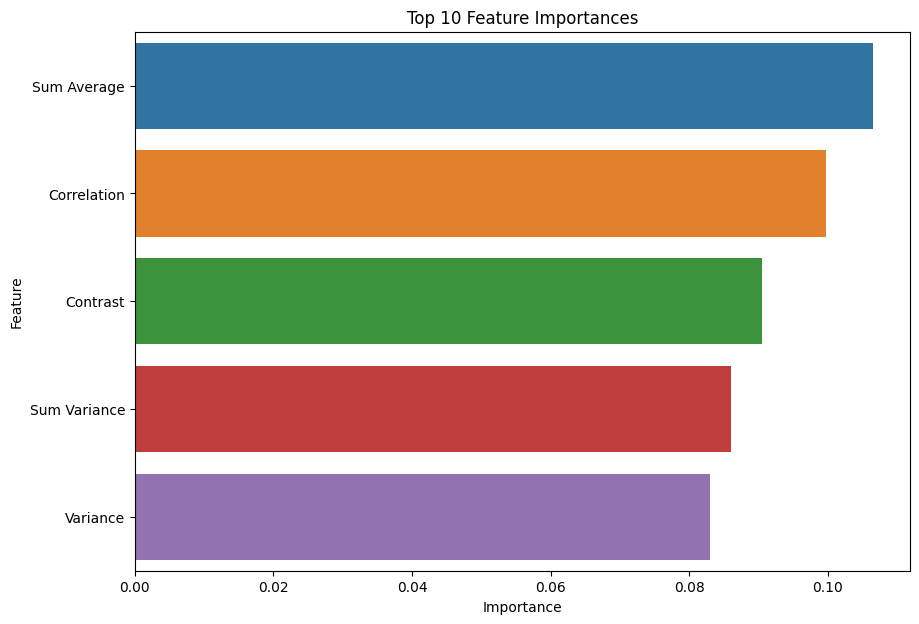

In [27]:
# Get feature importances from the classifier
import seaborn as sns
feature_importances = classifier.feature_importances_

# Create a DataFrame for visualization
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(5))
plt.title('Top 10 Feature Importances')
plt.show()


---

optuna

In [28]:
import optuna
from optuna.samplers import TPESampler
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the features and labels from CSV
df = pd.read_csv('/kaggle/input/glcm-a4c/complete_glcm_features_a4c.csv')

# Separate features and labels
X = df.drop('Label', axis=1)
y = df['Label']

# Handle missing values if there are any
X.fillna(X.mean(), inplace=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Define the objective function
def objective(trial):
    classifier_name = trial.suggest_categorical('classifier', ['RandomForest', 'LogisticRegression', 'NaiveBayes', 'SVM', 'KNN'])
    
    if classifier_name == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 10, 200)
        max_depth = trial.suggest_int('max_depth', 2, 32)
        clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    
    elif classifier_name == 'LogisticRegression':
        C = trial.suggest_float('C', 0.01, 10.0)
        clf = LogisticRegression(C=C, max_iter=1000, random_state=42)
    
    elif classifier_name == 'NaiveBayes':
        var_smoothing = trial.suggest_float('var_smoothing', 1e-10, 1e-1, log=True)
        clf = GaussianNB(var_smoothing=var_smoothing)
    
    elif classifier_name == 'SVM':
        C = trial.suggest_float('C', 0.01, 10.0)
        kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
        clf = SVC(C=C, kernel=kernel, probability=True, random_state=42)
    
    elif classifier_name == 'KNN':
        n_neighbors = trial.suggest_int('n_neighbors', 2, 20)
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Cross-validation
    score = cross_val_score(clf, X_train, y_train, n_jobs=-1, cv=3).mean()
    return score

In [ ]:
# Optimize hyperparameters for each classifier
study = optuna.create_study(direction='maximize', sampler=TPESampler())
study.optimize(objective, n_trials=100)

# Get the best parameters for each classifier
best_params_rf = study.best_params if study.best_params['classifier'] == 'RandomForest' else None
best_params_lr = study.best_params if study.best_params['classifier'] == 'LogisticRegression' else None
best_params_nb = study.best_params if study.best_params['classifier'] == 'NaiveBayes' else None
best_params_svm = study.best_params if study.best_params['classifier'] == 'SVM' else None
best_params_knn = study.best_params if study.best_params['classifier'] == 'KNN' else None

# Train each model with the best hyperparameters
models = []
if best_params_rf:
    models.append(('RandomForest', RandomForestClassifier(n_estimators=best_params_rf['n_estimators'], max_depth=best_params_rf['max_depth'], random_state=42)))
if best_params_lr:
    models.append(('LogisticRegression', LogisticRegression(C=best_params_lr['C'], max_iter=1000, random_state=42)))
if best_params_nb:
    models.append(('NaiveBayes', GaussianNB(var_smoothing=best_params_nb['var_smoothing'])))
if best_params_svm:
    models.append(('SVM', SVC(C=best_params_svm['C'], kernel=best_params_svm['kernel'], probability=True, random_state=42)))
if best_params_knn:
    models.append(('KNN', KNeighborsClassifier(n_neighbors=best_params_knn['n_neighbors'])))

# Create the voting classifier
ensemble = VotingClassifier(estimators=models, voting='soft')
ensemble.fit(X_train, y_train)

# Predict on the test set
y_pred = ensemble.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy * 100:.2f}%')

---

NN

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the features and labels from CSV
df = pd.read_csv('/kaggle/input/glcm-pla/complete_glcm_features_PLA.csv')

# Separate features and labels
X = df.drop('Label', axis=1)
y = df['Label']

# Handle missing values if there are any
X.fillna(X.mean(), inplace=True)

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert labels to categorical one-hot encoding
y_categorical = tf.keras.utils.to_categorical(y_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 output classes

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))


2024-06-07 22:45:35.944858: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-07 22:45:35.944945: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-07 22:45:36.074452: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
  80/1815 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4679 - loss: 1.2514

I0000 00:00:1717800351.591881     107 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717800351.608594     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1815/1815 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4967 - loss: 1.1617

W0000 00:00:1717800356.436834     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1815/1815 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4967 - loss: 1.1617 - val_accuracy: 0.5447 - val_loss: 1.0447
Epoch 2/50
1815/1815 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5566 - loss: 1.0227 - val_accuracy: 0.5721 - val_loss: 0.9881
Epoch 3/50
1815/1815 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5937 - loss: 0.9380 - val_accuracy: 0.6170 - val_loss: 0.8782
Epoch 4/50
1815/1815 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6307 - loss: 0.8596 - val_accuracy: 0.6285 - val_loss: 0.8526
Epoch 5/50
1815/1815 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6536 - loss: 0.8112 - val_accuracy: 0.6524 - val_loss: 0.8038
Epoch 6/50
1815/1815 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6776 - loss: 0.7642 - val_accuracy: 0.6639 - val_loss: 0.7785
Epoch 7/50
1815/1815 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6942 - loss: 0.7230 - val_accuracy: 0.6780 - val_loss: 0.7639
Epoch 8/50
1815/1815 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7128 - loss: 0.6886 - val_accurac

W0000 00:00:1717800550.672524     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

         III       0.86      0.89      0.87      6535
          MS       0.83      0.81      0.82      3190
         MVP       0.79      0.78      0.78      1327
          NL       0.83      0.80      0.81      3461

    accuracy                           0.84     14513
   macro avg       0.83      0.82      0.82     14513
weighted avg       0.84      0.84      0.84     14513



In [3]:
# Save the model architecture and weights
model.save('NN_PLA_glcm_classifier_model.h5')

In [4]:
data_list = [
    0.275381821, 49.16828323, 0.990161332, 2498.360968,
    0.721140475, 56.4560257, 9944.275587, 4.774877972,
    6.255061466, 0.001861088, 2.221268113, -0.553701842,
    0.995413027
]

print(data_list)

[0.275381821, 49.16828323, 0.990161332, 2498.360968, 0.721140475, 56.4560257, 9944.275587, 4.774877972, 6.255061466, 0.001861088, 2.221268113, -0.553701842, 0.995413027]


In [11]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

# Load the saved model
model = load_model('/kaggle/working/NN_PLA_glcm_classifier_model.h5')

# The new data to predict
data_list = [
    0.260839746, 42.03846039, 0.979680087, 1034.267901,
    0.721825383, 36.46160197, 4095.033144, 4.64651693,
    6.114509946, 0.001862259, 2.177520541, -0.539163551,
    0.993832327
]

# Convert the list to a NumPy array and reshape it
new_data = np.array([data_list])

# Load your training data to fit the scaler (this is an example, you should load your actual training data)
df = pd.read_csv('/kaggle/input/glcm-pla/complete_glcm_features_PLA.csv')
X = df.drop('Label', axis=1)

# Standardize the features
scaler = StandardScaler()
scaler.fit(X)

# Preprocess the new data
new_data_scaled = scaler.transform(new_data)

# Predict using the loaded model
predictions = model.predict(new_data_scaled)
predicted_classes = np.argmax(predictions, axis=1)

# Manually encode the classes
class_mapping = {0: 'III', 1: 'MS', 2: 'MVP', 3: 'NL'}
decoded_predictions = [class_mapping[pred_class] for pred_class in predicted_classes]

print(f"Predicted Label: {decoded_predictions[0]}")


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Predicted Label: III


In [10]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
dataset_path = '/kaggle/input/glcm-pla/complete_glcm_features_PLA.csv'
df = pd.read_csv(dataset_path)

# Extract the labels
labels = df['Label']

# Encode the labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Create a mapping of encoded labels to original labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Separate features and labels
X = df.drop('Label', axis=1)

Label Mapping: {'III': 0, 'MS': 1, 'MVP': 2, 'NL': 3}
     Energy   Contrast  Correlation     Variance  Inverse Difference Moment  \
0  0.275382  49.168283     0.990161  2498.360968                   0.721140   
1  0.249046  46.708773     0.989243  2170.821309                   0.713796   
2  0.314141  56.149885     0.988258  2390.683095                   0.648375   
3  0.321833  50.423971     0.988577  2206.900725                   0.661352   
4  0.268878  43.592932     0.990406  2271.518176                   0.726554   

   Sum Average  Sum Variance  Sum Entropy   Entropy  Difference Variance  \
0    56.456026   9944.275587     4.774878  6.255061             0.001861   
1    52.700200   8636.576463     4.901944  6.411439             0.001816   
2    57.776006   9506.582495     4.650144  6.322265             0.001426   
3    53.561089   8777.178927     4.564504  6.184383             0.001475   
4    53.133748   9042.479771     4.772148  6.213760             0.001886   

   Difference 

454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
NN Confusion Matrix for A4C View:
[[5806  310   86  333]
 [ 376 2580   93  141]
 [ 130   68 1030   99]
 [ 430  166   93 2772]]


NameError: name 'np' is not defined

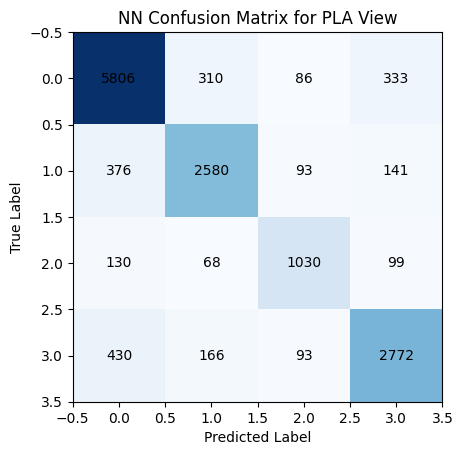

In [2]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a function to plot the confusion matrix (optional)
def plot_confusion_matrix(cm, class_names):
  """
  Plots a confusion matrix with labels.
  """
  fig, ax = plt.subplots()
  im = ax.imshow(cm, cmap=plt.cm.Blues)
  ax.grid(False)
  for i in range(len(class_names)):
    for j in range(len(class_names)):
      ax.text(j, i, cm[i, j], ha='center', va='center', color="black")
  ax.set_ylabel("True Label")
  ax.set_xlabel("Predicted Label")
  ax.set_title("NN Confusion Matrix for PLA View")
  ax.set_xticks(np.arange(len(class_names)))
  ax.set_yticks(np.arange(len(class_names)))
  ax.set_xticklabels(class_names, rotation=45, ha='right')
  ax.set_yticklabels(class_names)
  plt.colorbar(im, label='Count')
  plt.show()

# Print the confusion matrix
print("NN Confusion Matrix for A4C View:")
print(cm)

# Plot the confusion matrix (optional)
class_names = ["III", "MS", "NL", "MVP"]  # Assuming these are your class labels
plot_confusion_matrix(cm, class_names)

# # Plot confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

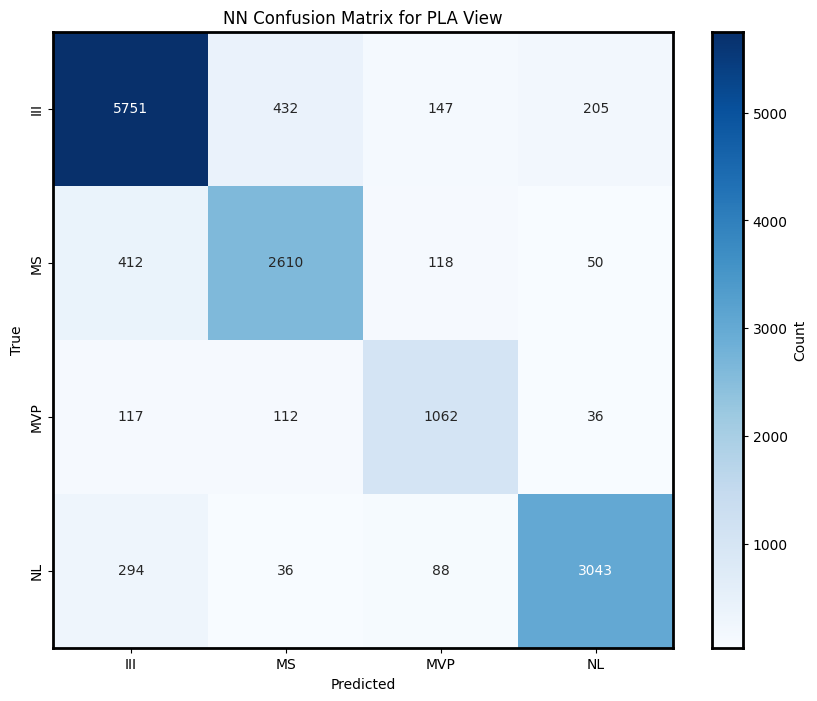

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming the confusion matrix values from the classification report
conf_matrix_values = np.array([
    [5751, 432, 147, 205],  # True III
    [412, 2610, 118, 50],   # True MS
    [117, 112, 1062, 36],   # True MVP
    [294, 36, 88, 3043]     # True NL
])

# Labels for the classes
labels = ['III', 'MS', 'MVP', 'NL']

# Create a figure with one subplot for the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_matrix_values, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=True, ax=ax)

# Add black border around the entire confusion matrix
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(2)

# Add black border around the color bar
cbar = ax.collections[0].colorbar
cbar.ax.spines['top'].set_visible(True)
cbar.ax.spines['top'].set_color('black')
cbar.ax.spines['top'].set_linewidth(2)
cbar.ax.spines['bottom'].set_visible(True)
cbar.ax.spines['bottom'].set_color('black')
cbar.ax.spines['bottom'].set_linewidth(2)
cbar.ax.spines['left'].set_visible(True)
cbar.ax.spines['left'].set_color('black')
cbar.ax.spines['left'].set_linewidth(2)
cbar.ax.spines['right'].set_visible(True)
cbar.ax.spines['right'].set_color('black')
cbar.ax.spines['right'].set_linewidth(2)
# Add 'count' next to the color bar
cbar.ax.set_ylabel('Count')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('NN Confusion Matrix for PLA View')
plt.show()


a4c nn

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the features and labels from CSV
df2 = pd.read_csv('/kaggle/input/glcm-a4c/complete_glcm_features_a4c.csv')

# Separate features and labels
X2 = df2.drop('Label', axis=1)
y2 = df2['Label']

# Handle missing values if there are any
X2.fillna(X2.mean(), inplace=True)

# Encode the labels
label_encoder2 = LabelEncoder()
y_encoded2 = label_encoder2.fit_transform(y2)

# Convert labels to categorical one-hot encoding
y_categorical2 = tf.keras.utils.to_categorical(y_encoded2)

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y_categorical2, test_size=0.2, random_state=42)

# Standardize the features
scaler2 = StandardScaler()
X_train2 = scaler2.fit_transform(X_train2)
X_test2 = scaler2.transform(X_test2)

# Build the neural network model
model2 = Sequential()
model2.add(Dense(512, input_dim=X_train2.shape[1], activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(3, activation='softmax'))  # Adjust output classes as necessary

# Compile the model
optimizer2 = Adam(learning_rate=0.001)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer2, metrics=['accuracy'])

# Train the model
history2 = model2.fit(X_train2, y_train2, epochs=50, batch_size=32, validation_data=(X_test2, y_test2))

# Evaluate the model
loss2, accuracy2 = model2.evaluate(X_test2, y_test2)
print(f"Accuracy: {accuracy2 * 100:.2f}%")

# Predict on the test set
y_pred2 = model2.predict(X_test2)
y_pred_classes2 = y_pred2.argmax(axis=1)
y_true2 = y_test2.argmax(axis=1)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_true2, y_pred_classes2, target_names=label_encoder2.classes_))


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  94/1623 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4933 - loss: 1.0542

W0000 00:00:1717802498.719848     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1623/1623 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5406 - loss: 0.9755

W0000 00:00:1717802505.140344     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717802505.585540     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1623/1623 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5407 - loss: 0.9755 - val_accuracy: 0.5766 - val_loss: 0.9257
Epoch 2/50
1623/1623 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5959 - loss: 0.8793 - val_accuracy: 0.6173 - val_loss: 0.8356
Epoch 3/50
1623/1623 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6275 - loss: 0.8184 - val_accuracy: 0.6428 - val_loss: 0.7978
Epoch 4/50
1623/1623 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6522 - loss: 0.7678 - val_accuracy: 0.6578 - val_loss: 0.7620
Epoch 5/50
1623/1623 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6770 - loss: 0.7176 - val_accuracy: 0.6767 - val_loss: 0.7182
Epoch 6/50
1623/1623 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6996 - loss: 0.6775 - val_accuracy: 0.7036 - val_loss: 0.6721
Epoch 7/50
1623/1623 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7205 - loss: 0.6376 - val_accuracy: 0.7253 - val_loss: 0.6282
Epoch 8/50
1623/1623 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7311 - loss: 0.6122 - val_accura

W0000 00:00:1717802664.087588     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

         III       0.88      0.88      0.88      6406
          MS       0.88      0.81      0.84      3285
          NL       0.80      0.85      0.82      3292

    accuracy                           0.86     12983
   macro avg       0.85      0.85      0.85     12983
weighted avg       0.86      0.86      0.86     12983



In [13]:
model2.save('NN_A4C_glcm_classifier_model.h5')

In [14]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
dataset_path = '/kaggle/input/glcm-a4c/complete_glcm_features_a4c.csv'
df = pd.read_csv(dataset_path)

# Extract the labels
labels = df['Label']

# Encode the labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Create a mapping of encoded labels to original labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Separate features and labels
X = df.drop('Label', axis=1)

Label Mapping: {'III': 0, 'MS': 1, 'NL': 2}
     Energy   Contrast  Correlation     Variance  Inverse Difference Moment  \
0  0.257928  57.098993     0.985943  2030.796366                   0.620438   
1  0.247948  46.593928     0.988832  2085.941441                   0.724455   
2  0.253791  59.561881     0.985388  2037.903844                   0.614608   
3  0.243265  47.925472     0.988606  2102.815928                   0.721020   
4  0.257851  56.209555     0.986214  2038.499701                   0.628928   

   Sum Average  Sum Variance  Sum Entropy   Entropy  Difference Variance  \
0    50.606155   8066.086471     4.930350  6.698972             0.001258   
1    50.933189   8297.171837     4.894141  6.368806             0.001878   
2    51.079984   8092.053496     4.959606  6.735669             0.001237   
3    51.076120   8363.338242     4.931467  6.423686             0.001859   
4    50.211294   8097.789249     4.926531  6.675261             0.001291   

   Difference Entropy  I

In [20]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
dataset_path = '/kaggle/input/glcm-a4c/complete_glcm_features_a4c.csv'
df = pd.read_csv(dataset_path)

# Extract the labels
labels = df['Label']

# Encode the labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Check unique classes in the dataset
unique_classes = np.unique(labels)
print("Unique Classes in Dataset:", unique_classes)

# Create a mapping of encoded labels to original labels based on unique classes
label_mapping = dict(zip(unique_classes, range(len(unique_classes))))
print("Label Mapping:", label_mapping)

# Separate features and labels
X = df.drop('Label', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Load the saved model
model = load_model('/kaggle/working/NN_A4C_glcm_classifier_model.h5')

# The new data to predict
data_list = [
    0.146283821, 53.91526067, 0.985317213, 1835.879578,
    0.533989146, 59.54531041, 7289.603051, 5.889061591,
    8.075291505, 0.00089546, 3.108869293, -0.447083275,
    0.994758494
]
# Convert the list to a NumPy array and reshape it
new_data = np.array([data_list])

# Preprocess the new data
new_data_scaled = scaler.transform(new_data)

# Predict using the loaded model
predictions = model.predict(new_data_scaled)
predicted_classes = np.argmax(predictions, axis=1)

# Decode the predicted labels using the specified label mapping
inverse_label_mapping = {v: k for k, v in label_mapping.items()}
decoded_predictions = [inverse_label_mapping[pred_class] for pred_class in predicted_classes]

print(f"Predicted Label: {decoded_predictions[0]}")


Unique Classes in Dataset: ['III' 'MS' 'NL']
Label Mapping: {'III': 0, 'MS': 1, 'NL': 2}


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Predicted Label: NL


In [2]:
pip install mahotas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 18.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import mahotas as mh
from skimage import io, color
import numpy as np

def extract_glcm_features(image):
    """ Extract GLCM features from an image converted to grayscale and scaled to 8-bit. """
    try:
        gray_image = color.rgb2gray(image)
        gray_image = (gray_image * 255).astype(np.uint8)
        features = mh.features.haralick(gray_image).mean(0)
        return features
    except Exception as e:
        print(f"Error processing image with GLCM: {e}")
        return np.zeros(13)  # Return an array of zeros if there's an error

def process_single_image(file_path):
    """ Load a single image and extract its GLCM features. """
    try:
        image = io.imread(file_path, as_gray=False)
        if image.size == 0:
            raise ValueError("Image is empty.")
        features = extract_glcm_features(image)
        return features
    except Exception as e:
        print(f"Failed to process image {file_path}: {e}")
        return None

# Define the path to the single image
image_path = '/kaggle/input/end-diastolic-frames/III_III_TrainVal (16)_image_00023.jpg'

# Extract features
features = process_single_image(image_path)

# Check if features were extracted successfully
if features is not None:
    print("GLCM Features:", features.tolist())
else:
    print("Failed to extract features from the image.")


GLCM Features: [0.29781299702598996, 54.22874949907435, 0.9898810795223523, 2679.2465094982363, 0.708152260013251, 57.94063813607505, 10662.757288493875, 4.705075931182995, 6.255261337568027, 0.0017967684237780645, 2.3113435978349983, -0.5325508778639535, 0.9942784936645552]


406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
NN Confusion Matrix for A4C View:
[[5730  361  135  309]
 [ 319 2628   91  152]
 [  94  100 1064   69]
 [ 387  194  114 2766]]


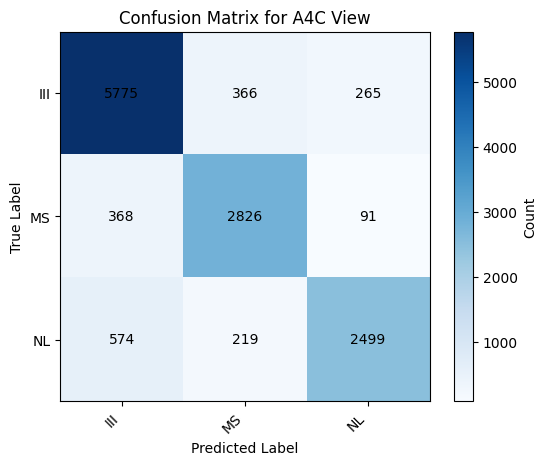

Classification Report:


ValueError: Number of classes, 3, does not match size of target_names, 4. Try specifying the labels parameter

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Predict on the test set
y_pred_prob2 = model2.predict(X_test2)
y_pred2 = y_pred_prob2.argmax(axis=1)
y_true2 = y_test2.argmax(axis=1)

# Confusion matrix
cm2 = confusion_matrix(y_true2, y_pred2)

# Create a function to plot the confusion matrix (optional)
def plot_confusion_matrix(cm, class_names):
  """
  Plots a confusion matrix with labels.
  """
  fig, ax = plt.subplots()
  im = ax.imshow(cm2, cmap=plt.cm.Blues)
  ax.grid(False)
  for i in range(len(class_names2)):
    for j in range(len(class_names2)):
      ax.text(j, i, cm[i, j], ha='center', va='center', color="black")
  ax.set_ylabel("True Label")
  ax.set_xlabel("Predicted Label")
  ax.set_title("Confusion Matrix for A4C View")
  ax.set_xticks(np.arange(len(class_names2)))
  ax.set_yticks(np.arange(len(class_names2)))
  ax.set_xticklabels(class_names2, rotation=45, ha='right')
  ax.set_yticklabels(class_names2)
  plt.colorbar(im, label='Count')
  plt.show()

# Print the confusion matrix
print("NN Confusion Matrix for A4C View:")
print(cm)

# Plot the confusion matrix (optional)
class_names2 = ["III", "MS", "NL"]  # Assuming these are your class labels
plot_confusion_matrix(cm2, class_names2)

# # Plot confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_true2, y_pred2, target_names=label_encoder.classes_))

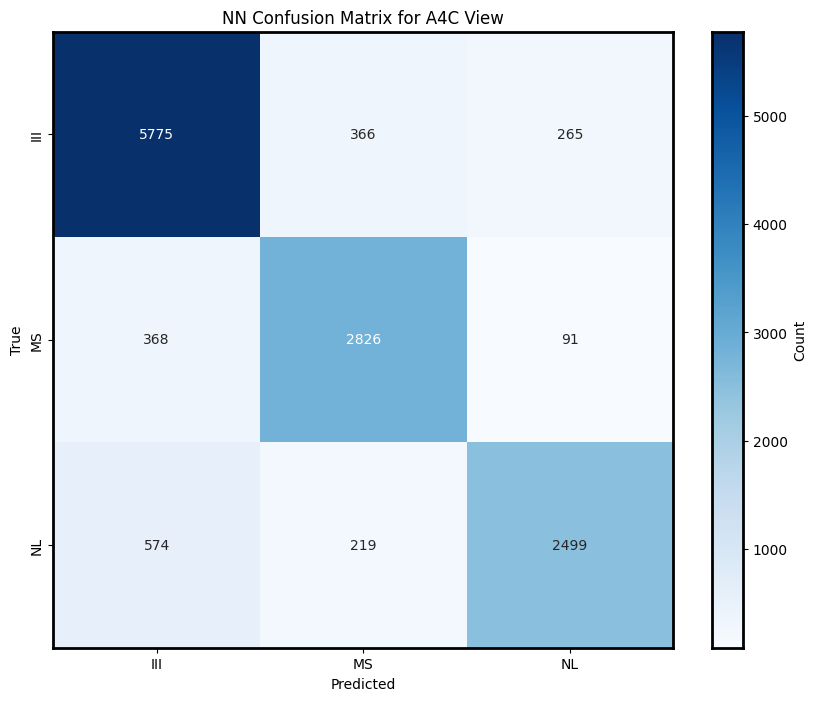

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix values extracted from the provided image
conf_matrix_values = np.array([
    [5775, 366, 265],  # True III
    [368, 2826, 91],  # True MS
    [574, 219, 2499]   # True NL
])

# Labels for the classes
labels = ['III', 'MS', 'NL']

# Create a figure with one subplot for the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_matrix_values, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=True, ax=ax)

# Add black border around the entire confusion matrix
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(2)

# Add black border around the color bar
cbar = ax.collections[0].colorbar
cbar.ax.spines['top'].set_visible(True)
cbar.ax.spines['top'].set_color('black')
cbar.ax.spines['top'].set_linewidth(2)
cbar.ax.spines['bottom'].set_visible(True)
cbar.ax.spines['bottom'].set_color('black')
cbar.ax.spines['bottom'].set_linewidth(2)
cbar.ax.spines['left'].set_visible(True)
cbar.ax.spines['left'].set_color('black')
cbar.ax.spines['left'].set_linewidth(2)
cbar.ax.spines['right'].set_visible(True)
cbar.ax.spines['right'].set_color('black')
cbar.ax.spines['right'].set_linewidth(2)

# Add 'Count' next to the color bar
cbar.ax.set_ylabel('Count')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('NN Confusion Matrix for A4C View')
plt.show()


---

ensemble

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Load the features and labels from CSV
df3 = pd.read_csv('/kaggle/input/glcm-pla/complete_glcm_features_PLA.csv')

# Separate features and labels
X3 = df3.drop('Label', axis=1)
y3 = df3['Label']

# Handle missing values if there are any
X3.fillna(X3.mean(), inplace=True)

# Encode the labels
label_encoder3 = LabelEncoder()
y_encoded3 = label_encoder3.fit_transform(y3)

# Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y_encoded3, test_size=0.2, random_state=42)

# Standardize the features
scaler3 = StandardScaler()
X_train3 = scaler3.fit_transform(X_train3)
X_test3 = scaler3.transform(X_test3)

# Define individual classifiers
rf_model3 = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model3 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
lr_model3 = LogisticRegression(max_iter=200, random_state=42)

# Combine models into a Voting Classifier
ensemble_model3 = VotingClassifier(estimators=[
    ('rf', rf_model3),
    ('xgb', xgb_model3),
    ('lr', lr_model3)
], voting='soft')

# Train the ensemble model
ensemble_model3.fit(X_train3, y_train3)

# Predict on the test set
y_pred3 = ensemble_model3.predict(X_test3)

# Evaluate the ensemble model
accuracy3 = accuracy_score(y_test3, y_pred3)
print(f"Accuracy: {accuracy3 * 100:.2f}%")


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 77.28%


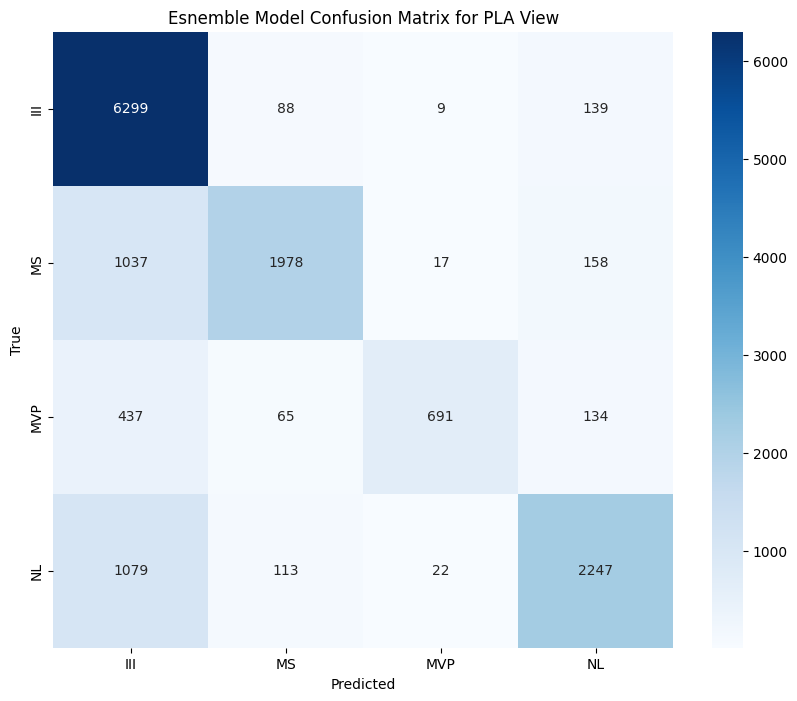

Classification Report:
              precision    recall  f1-score   support

         III       0.71      0.96      0.82      6535
          MS       0.88      0.62      0.73      3190
         MVP       0.94      0.52      0.67      1327
          NL       0.84      0.65      0.73      3461

    accuracy                           0.77     14513
   macro avg       0.84      0.69      0.74     14513
weighted avg       0.80      0.77      0.76     14513



In [35]:
# Confusion matrix
cm3 = confusion_matrix(y_test3, y_pred3)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder3.classes_, yticklabels=label_encoder3.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Esnemble Model Confusion Matrix for PLA View')
plt.show()

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test3, y_pred3, target_names=label_encoder3.classes_))


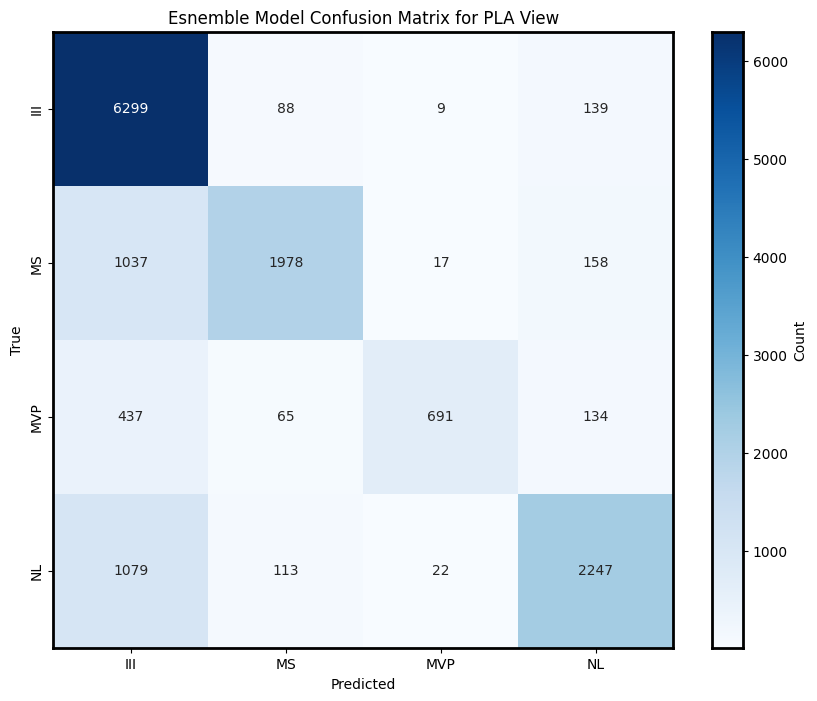

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix values extracted from the provided image
conf_matrix_values = np.array([
    [6299, 88, 9, 139],  # True III
    [1037, 1978, 17, 158],  # True MS
    [437, 65, 691, 134],  # True MVP
    [1079, 113, 22, 2247]   # True NL
])

# Labels for the classes
labels = ['III', 'MS', 'MVP', 'NL']

# Create a figure with one subplot for the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_matrix_values, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=True, ax=ax)

# Add black border around the entire confusion matrix
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(2)

# Add black border around the color bar
cbar = ax.collections[0].colorbar
cbar.ax.spines['top'].set_visible(True)
cbar.ax.spines['top'].set_color('black')
cbar.ax.spines['top'].set_linewidth(2)
cbar.ax.spines['bottom'].set_visible(True)
cbar.ax.spines['bottom'].set_color('black')
cbar.ax.spines['bottom'].set_linewidth(2)
cbar.ax.spines['left'].set_visible(True)
cbar.ax.spines['left'].set_color('black')
cbar.ax.spines['left'].set_linewidth(2)
cbar.ax.spines['right'].set_visible(True)
cbar.ax.spines['right'].set_color('black')
cbar.ax.spines['right'].set_linewidth(2)

# Add 'Count' next to the color bar
cbar.ax.set_ylabel('Count')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Esnemble Model Confusion Matrix for PLA View')
plt.show()


---

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Load the features and labels from CSV
df4 = pd.read_csv('/kaggle/input/glcm-a4c/complete_glcm_features_a4c.csv')

# Separate features and labels
X4 = df4.drop('Label', axis=1)
y4 = df4['Label']

# Handle missing values if there are any
X4.fillna(X4.mean(), inplace=True)

# Encode the labels
label_encoder4 = LabelEncoder()
y_encoded4 = label_encoder4.fit_transform(y4)

# Split the data into training and testing sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y_encoded4, test_size=0.2, random_state=42)

# Standardize the features
scaler4 = StandardScaler()
X_train4 = scaler4.fit_transform(X_train4)
X_test4 = scaler4.transform(X_test4)

# Define individual classifiers
rf_model4 = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model4 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
lr_model4 = LogisticRegression(max_iter=200, random_state=42)

# Combine models into a Voting Classifier
ensemble_model4 = VotingClassifier(estimators=[
    ('rf', rf_model4),
    ('xgb', xgb_model4),
    ('lr', lr_model4)
], voting='soft')

# Train the ensemble model
ensemble_model4.fit(X_train4, y_train4)

# Predict on the test set
y_pred4 = ensemble_model4.predict(X_test4)

# Evaluate the ensemble model
accuracy4 = accuracy_score(y_test4, y_pred4)
print(f"Accuracy: {accuracy4 * 100:.2f}%")



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 78.51%


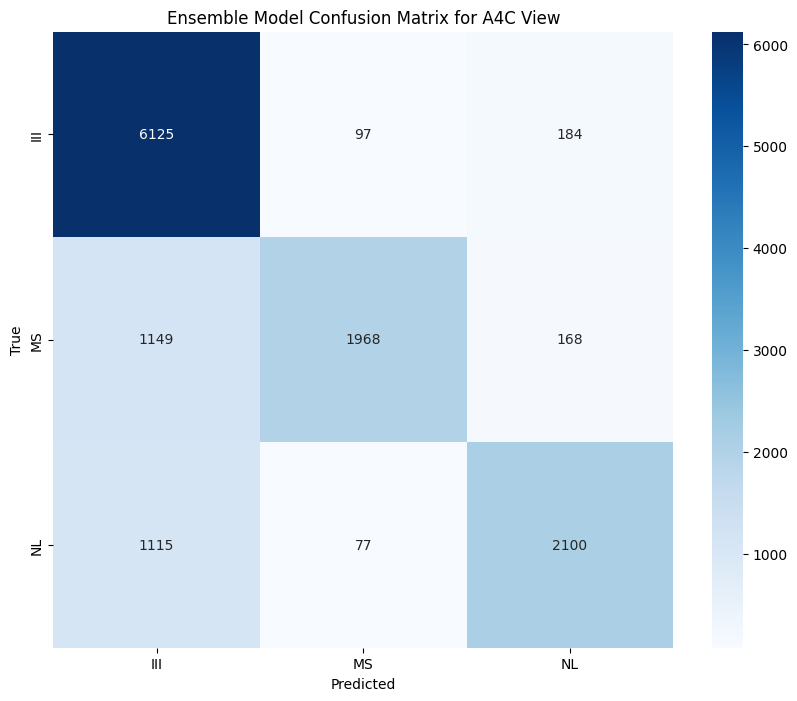

Classification Report:
              precision    recall  f1-score   support

         III       0.73      0.96      0.83      6406
          MS       0.92      0.60      0.73      3285
          NL       0.86      0.64      0.73      3292

    accuracy                           0.79     12983
   macro avg       0.84      0.73      0.76     12983
weighted avg       0.81      0.79      0.78     12983



In [18]:
# Confusion matrix
cm4 = confusion_matrix(y_test4, y_pred4)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder4.classes_, yticklabels=label_encoder4.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Ensemble Model Confusion Matrix for A4C View')
plt.show()

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test4, y_pred4, target_names=label_encoder4.classes_))


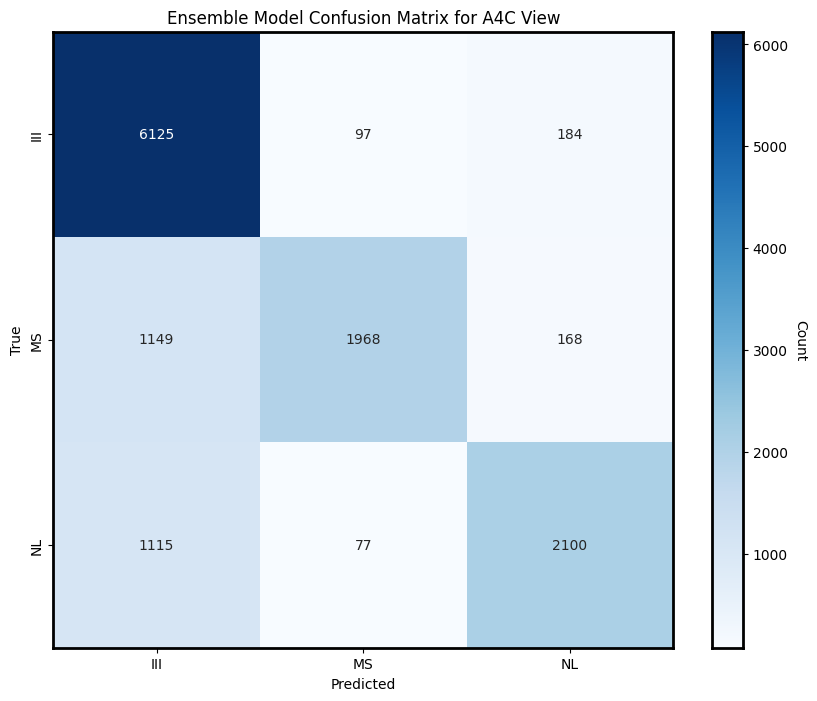

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix values extracted from the provided image
conf_matrix_values = np.array([
    [6125, 97, 184],  # True III
    [1149, 1968, 168],  # True MS
    [1115, 77, 2100]   # True NL
])

# Labels for the classes
labels = ['III', 'MS', 'NL']

# Create a figure with one subplot for the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_matrix_values, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=True, ax=ax)

# Add black border around the entire confusion matrix
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(2)

# Add black border around the color bar
cbar = ax.collections[0].colorbar
cbar.ax.spines['top'].set_visible(True)
cbar.ax.spines['top'].set_color('black')
cbar.ax.spines['top'].set_linewidth(2)
cbar.ax.spines['bottom'].set_visible(True)
cbar.ax.spines['bottom'].set_color('black')
cbar.ax.spines['bottom'].set_linewidth(2)
cbar.ax.spines['left'].set_visible(True)
cbar.ax.spines['left'].set_color('black')
cbar.ax.spines['left'].set_linewidth(2)
cbar.ax.spines['right'].set_visible(True)
cbar.ax.spines['right'].set_color('black')
cbar.ax.spines['right'].set_linewidth(2)

# Add 'Count' next to the color bar
cbar.ax.set_ylabel('Count', rotation=-90, va="bottom")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Ensemble Model Confusion Matrix for A4C View')
plt.show()
